## EE 242 Lab 3 - Signal Synthesis and Analysis

Sabrina Hwang, Bryan Vo, Ting Jones

In [1]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import simpleaudio as sa
import IPython
# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Section 1: Generating simple periodic signals

In [2]:
# Part A: Function of Signal Generation

# soundLength: length of time vector
# coeff: array of Fourier series coefficients 
# f0: fundamental frequency 
# fs: sampling frequency 
# returns t: time samples vector corresponding to x: generated signal (sawtooth, triangle wave, etc)

def signalGen(soundLength, coeff, f0, fs):
    totalsamples = fs * soundLength
    t = np.arange(totalsamples) * (1/fs)
    x = coeff[0] * np.ones(len(t))
    for k in range(len(coeff)):
        x = np.add(x, 2 * np.abs(coeff[k]) * np.cos((k) * 2 * np.pi * f0 * t + np.angle(coeff[k])))
    return t, x

<IPython.core.display.Javascript object>


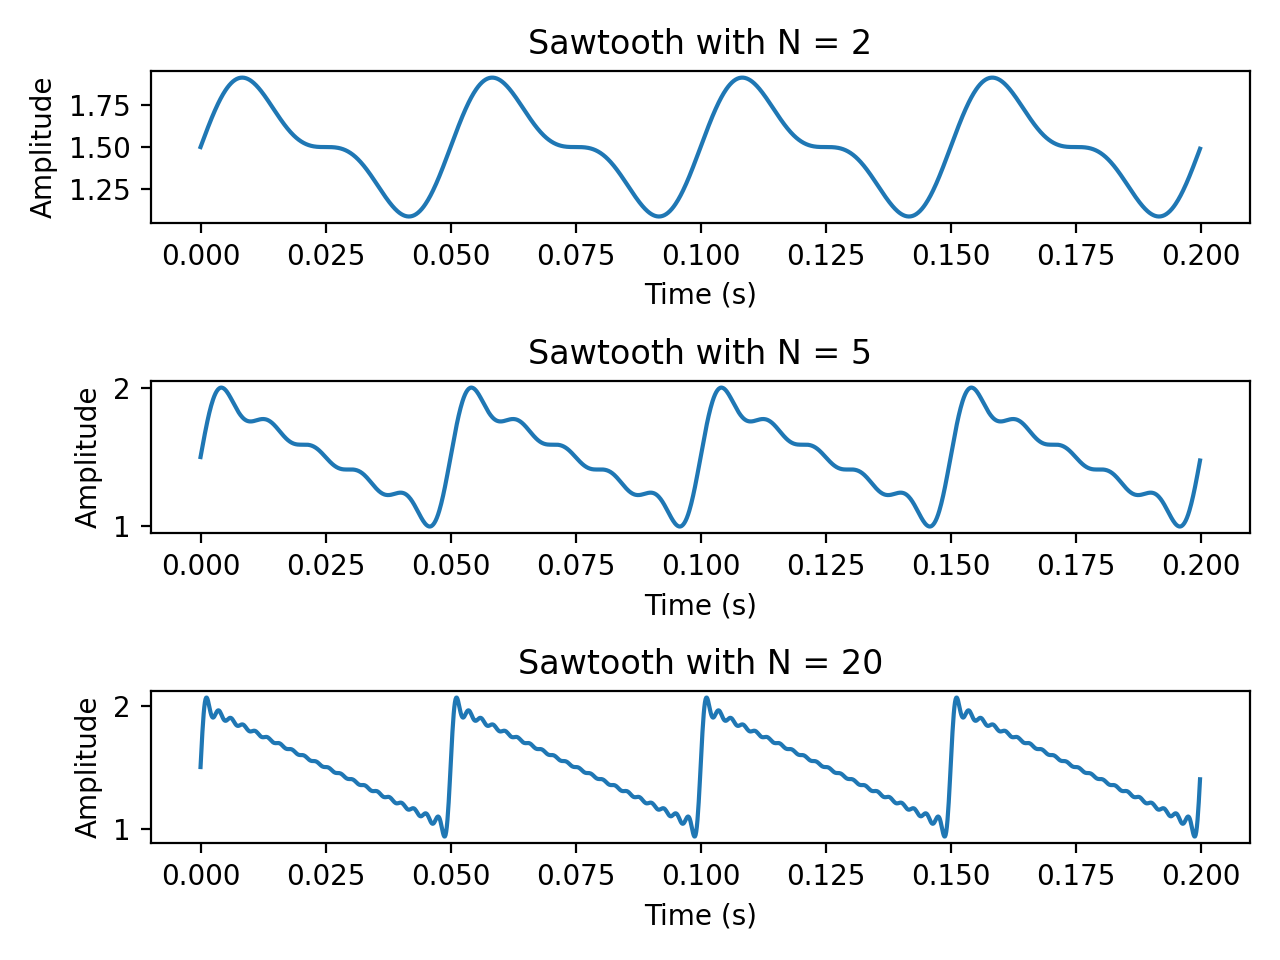

/Users/bryanvo/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/bryanvo/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/bryanvo/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [3]:
# Part B: Time Vector for 200ms

# Defining variables
fs = 8000
f = 20
t = np.arange(0, 0.2, 1/fs)


# Part C: Sawtooth Signal


# creating approximations of the signal dependent on N
a0 = np.ones(1) * 0.5

a2 = np.concatenate((a0, 1 / (2 * 1j * np.pi * np.arange(1, 2 + 1, 1))))
a5 = np.concatenate((a0, 1 / (2 * 1j * np.pi * np.arange(1, 5 + 1, 1))))
a20 = np.concatenate((a0, 1 / (2 * 1j * np.pi * np.arange(1, 20 + 1, 1))))

t2, sawTooth_N2 = signalGen(0.2, a2, f, fs)
t5, sawTooth_N5 = signalGen(0.2, a5, f, fs)
t20, sawTooth_N20 = signalGen(0.2, a20, f, fs)

plt.figure(1)

# plotting sawtooth of N = 2
plt.subplot(311)
plt.title('Sawtooth with N = 2')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.plot(t2, sawTooth_N2)

# plotting sawtooth of N = 5
plt.subplot(312)
plt.title('Sawtooth with N = 5')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.plot(t5, sawTooth_N5)

# plotting sawtooth of N = 5
plt.subplot(313)
plt.title('Sawtooth with N = 20')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.plot(t20, sawTooth_N20)

plt.tight_layout()

<IPython.core.display.Javascript object>


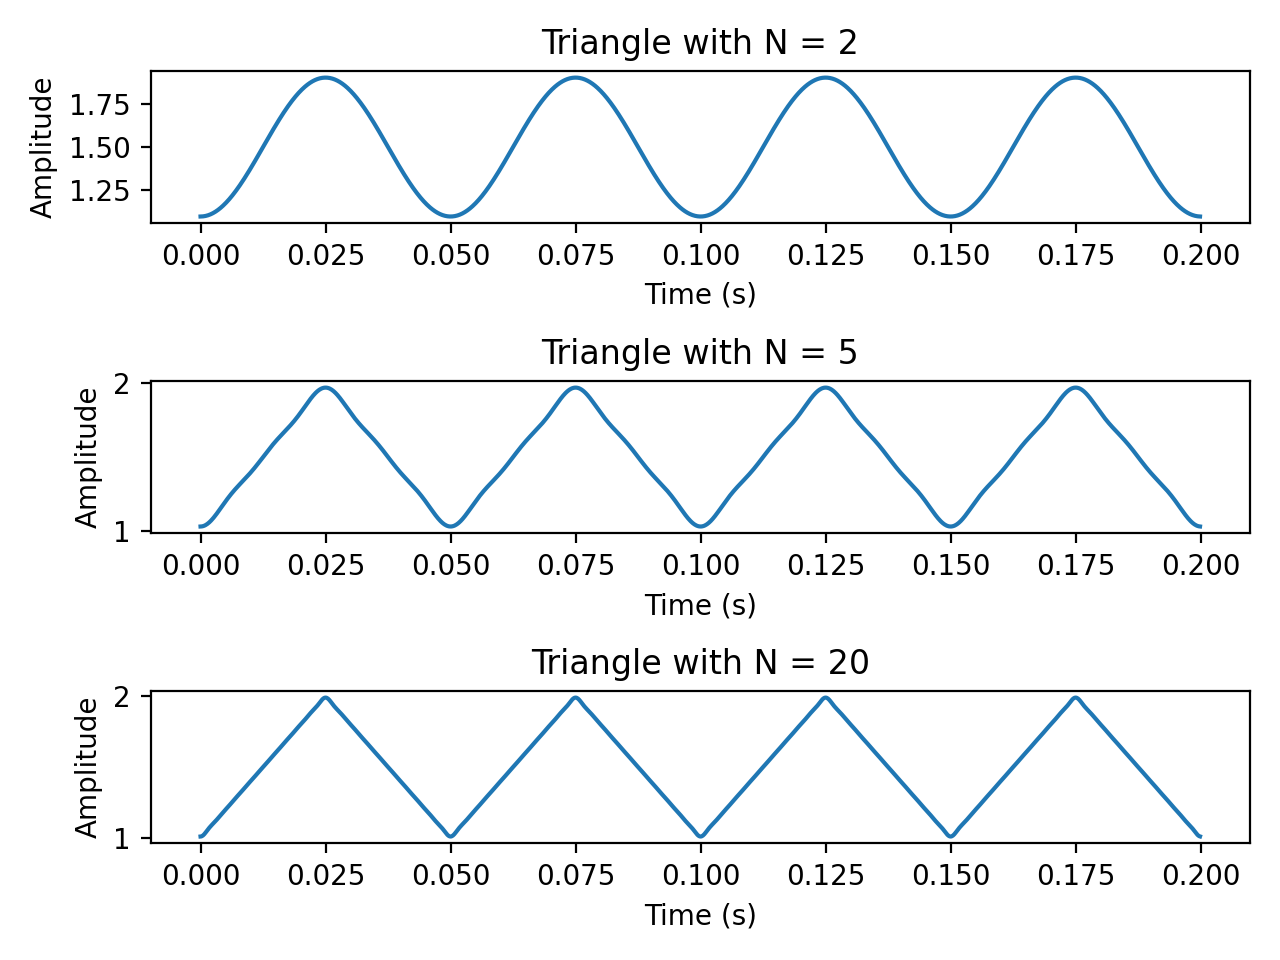

/Users/bryanvo/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/bryanvo/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/bryanvo/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [4]:
# Part D: Triangle Signal

# creating approximations of the signal dependent on N
a0 = np.ones(1) * 0.5

k2 = np.arange(1, 2, 1)
k5 = np.arange(1, 6, 1)
k20 = np.arange(1, 21, 1)

a2 = ((2 * np.sin(k2 * np.pi / 2)) / (1j * (k2 * np.pi) ** 2)) * np.exp((-1j * k2 * np.pi)/2)
a5 = (2 * np.sin(k5 * np.pi / 2)) / (1j * (k5 * np.pi) ** 2) * np.exp((-1j * k5 * np.pi)/2)
a20 = (2 * np.sin(k20 * np.pi / 2)) / (1j * (k20 * np.pi) ** 2) * np.exp((-1j * k20 * np.pi)/2)


t2, triangle_N2 = signalGen(0.2, np.concatenate([a0, a2]), f, fs)
t5, triangle_N5 = signalGen(0.2, np.concatenate([a0, a5]), f, fs)
t20, triangle_N20 = signalGen(0.2, np.concatenate([a0, a20]), f, fs)


plt.figure(2)

# plotting triangle wave of N = 2
plt.subplot(311)
plt.title('Triangle with N = 2')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.plot(t2, triangle_N2)

# plotting triangle wave of N = 5
plt.subplot(312)
plt.title('Triangle with N = 5')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.plot(t5, triangle_N5)

# plotting triangle wave of N = 20
plt.subplot(313)
plt.title('Triangle with N = 20')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.plot(t20, triangle_N20)

plt.tight_layout()

**Report Discussion**

1.) a_k denominator in sawtooth signal is increasing linearly while a_k denominator in traingle signal is increasing exponentially allowing for the second signal to converge much quicker

2.) The triangle signal is closer related to a true sine wave compared to a sawtooth signal which allows for quicker converging. 

# Section 2: Synthesizing Musical Note

In [5]:
# Part A

# reading in horn signal
fs, originalHorn = wav.read('horn11short.wav')

# creating time vector of length 100ms
totalsamples = .1 * fs
tNote = np.arange(totalsamples) * (1/fs)

# creating sinusoidal signal
f0 = 335
sound = 2000 * np.sin(2 * np.pi * f0 * tNote)

# saving to wav file
wav.write('sin335Hz.wav', fs, sound.astype('int16'))

/var/folders/5l/1dz724hd3951qp5gx9pzyrq40000gn/T/ipykernel_12121/4192691982.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  wav.write('inputSignal.wav', fs, inputSignal.astype('int16'))


<IPython.core.display.Javascript object>


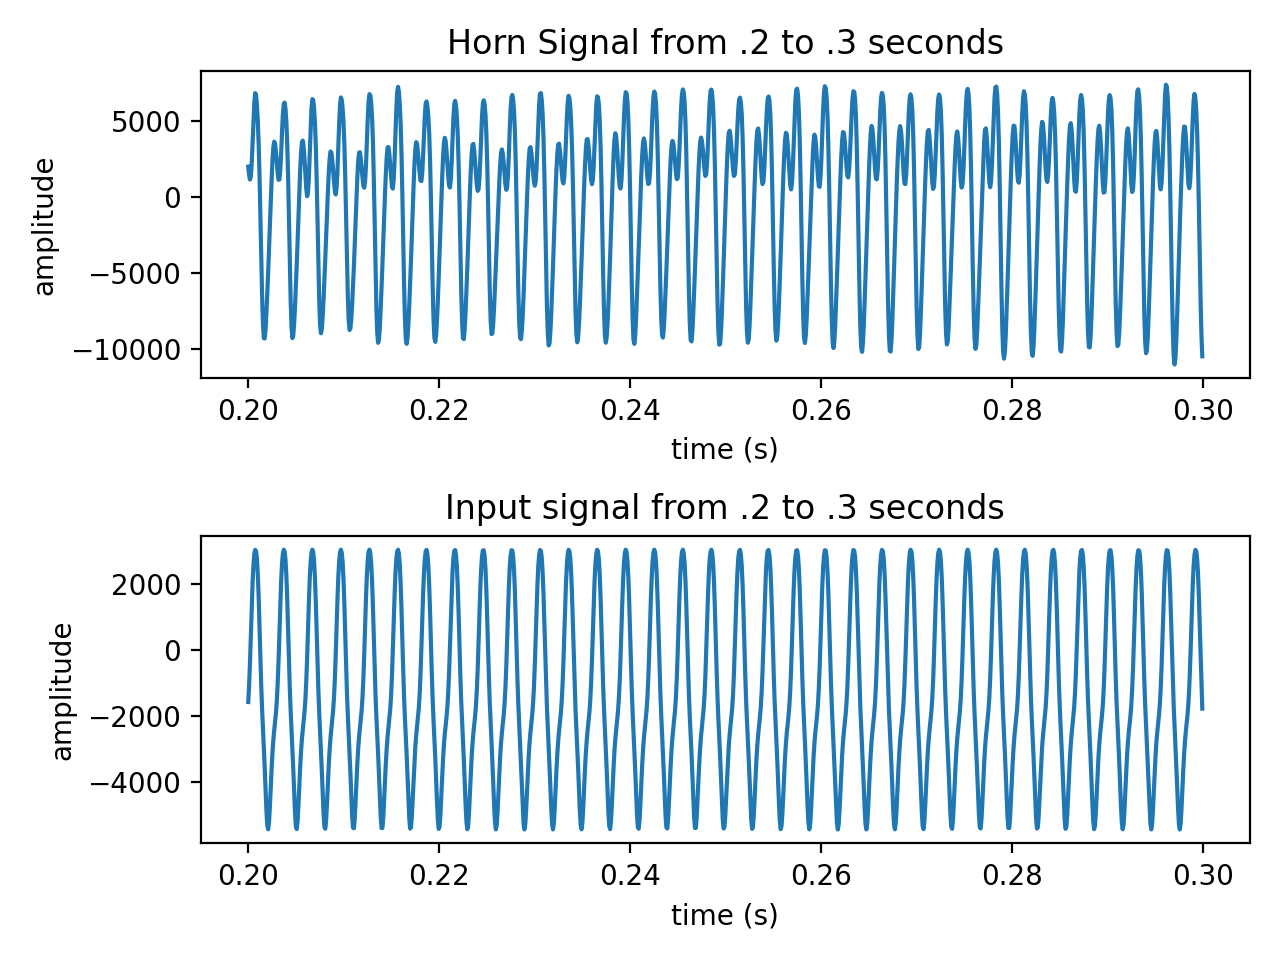

/Users/bryanvo/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [6]:
# Part B

a_magnitude = np.array([2688,1900,316,178,78,38])
a_phase = np.array([-1.73,-1.45,2.36,2.30,-2.30,1.13])

# characterizing a_k
a = np.multiply(a_magnitude, np.cos(a_phase))
b = np.multiply(a_magnitude, np.sin(a_phase))
coeff = np.add(a, 1j * b)

# synthesizing the signal
t, inputSignal = signalGen(len(originalHorn) * 1 / fs, coeff, f0, fs)

# saving to wav file
wav.write('inputSignal.wav', fs, inputSignal.astype('int16'))

# Part C

# defining start time at 200ms
hornSnippet = originalHorn[int(.2 * fs):int(.3 * fs) + 1]
timeSnippet = np.arange(.2, .3, 1/fs)
inputSnippet = inputSignal[int(.2 * fs):int(.3 * fs) + 1]

plt.figure(3)

# plotting horn signal
plt.subplot(211)
plt.title('Horn Signal from .2 to .3 seconds')
plt.ylabel('amplitude')
plt.xlabel('time (s)')
plt.plot(timeSnippet, hornSnippet)

# plotting generated signal
plt.subplot(212)
plt.title('Input signal from .2 to .3 seconds')
plt.ylabel('amplitude')
plt.xlabel('time (s)')
plt.plot(timeSnippet, inputSnippet)

plt.tight_layout()

# Part D

# reading in wav files
wav_obj_original = sa.WaveObject.from_wave_file('horn11short.wav')
wav_obj_note = sa.WaveObject.from_wave_file('sin335Hz.wav')
wav_obj_6Tone = sa.WaveObject.from_wave_file('inputSignal.wav')

# playing original file
play_obj_original = wav_obj_original.play()
play_obj_original.wait_done()

# playing the single tone file
play_obj_note = wav_obj_note.play()
play_obj_note.wait_done()

# playing the 6-tone approximation file
play_obj_6Tone = wav_obj_6Tone.play()
play_obj_6Tone.wait_done()

**Report Discussion**

The main source of distortion is due to the approximation being truly periodic whilst the original signal is not truly periodic. Therefore, one single value frequency as the parameter, results in distortion due to it being one value approximating the signal. 

# Section 3: Analyzing Frequency Content of a Signal

<IPython.core.display.Javascript object>


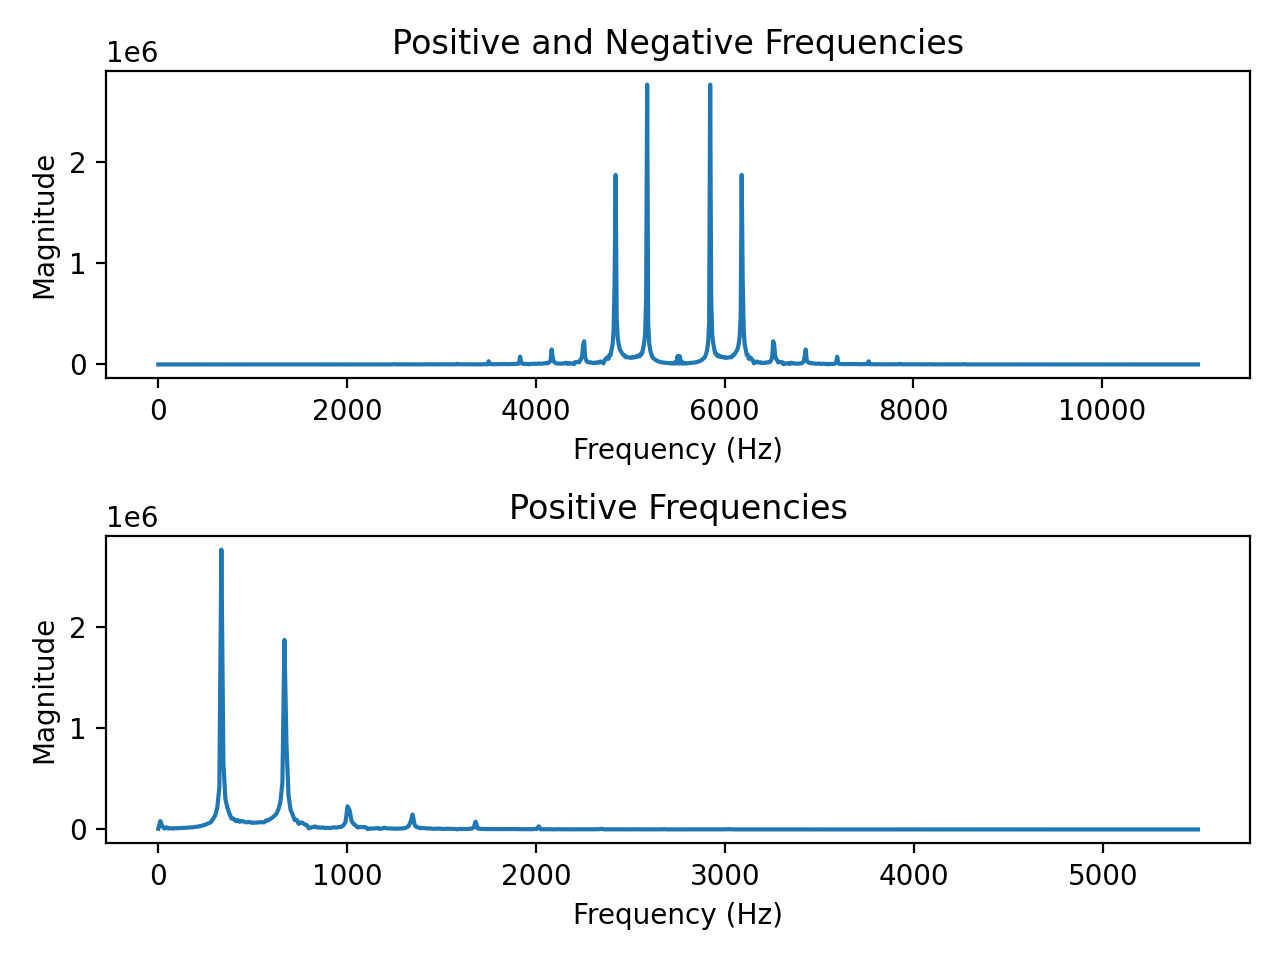

In [7]:
# Part A

# computing FFT of 100ms horn signal
nfft = 1024

# calculating fft of the horn snippet
xhf = np.fft.fft(hornSnippet, nfft)
xhf2 = np.fft.fftshift(xhf)

# finding magnitude for shifted nfft
# creating corresponding frequency vector
xhf2Abs = np.abs(xhf2)
t_arr2 = np.arange(len(xhf2Abs))
freq2 = t_arr2 * fs/nfft

# finding magnitude of unshifted nfft and frequency
# vector without the shift (only positive)
xhfAbs = np.abs(xhf)
xhfHalf = xhfAbs[:nfft // 2]
t_arr = np.arange(len(xhfHalf))
freq = t_arr * fs/nfft

plt.figure(4)

# plotting positive and negative frequencies
plt.subplot(211)
plt.title('Positive and Negative Frequencies')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.plot(freq2, xhf2Abs)

# plotting positive frequencies 
plt.subplot(212)
plt.title('Positive Frequencies')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.plot(freq, xhfHalf)

plt.tight_layout()

<IPython.core.display.Javascript object>


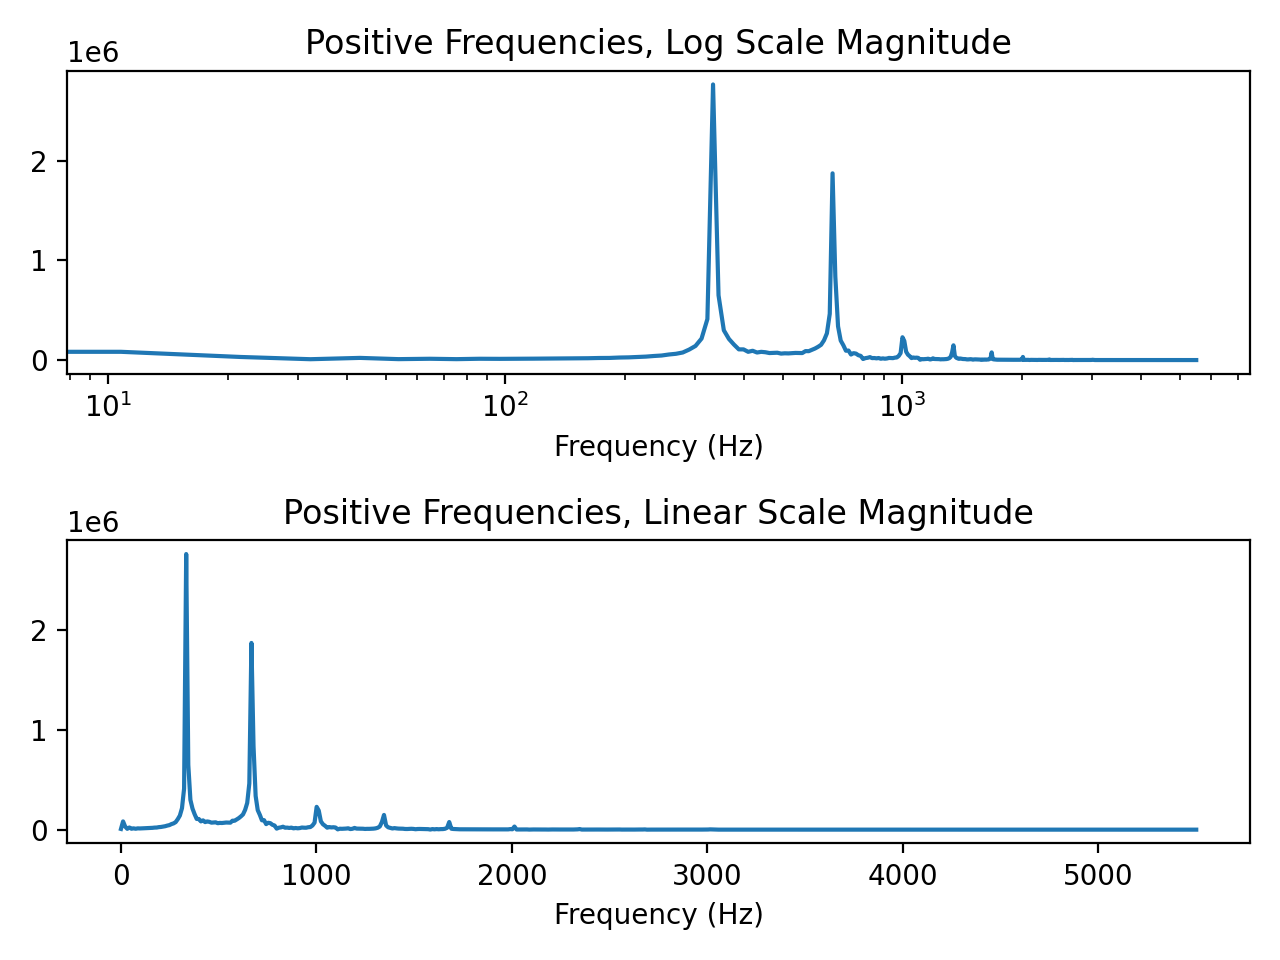

In [8]:
# Part B

plt.figure(5)

# plotting in log scale
plt.subplot(211)
plt.title('Positive Frequencies, Log Scale Magnitude')
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.plot(freq, xhfHalf)

# plotting in linear scale
plt.subplot(212)
plt.title('Positive Frequencies, Linear Scale Magnitude')
plt.xlabel('Frequency (Hz)')
plt.xscale('linear')
plt.plot(freq, xhfHalf)

plt.tight_layout()

<IPython.core.display.Javascript object>


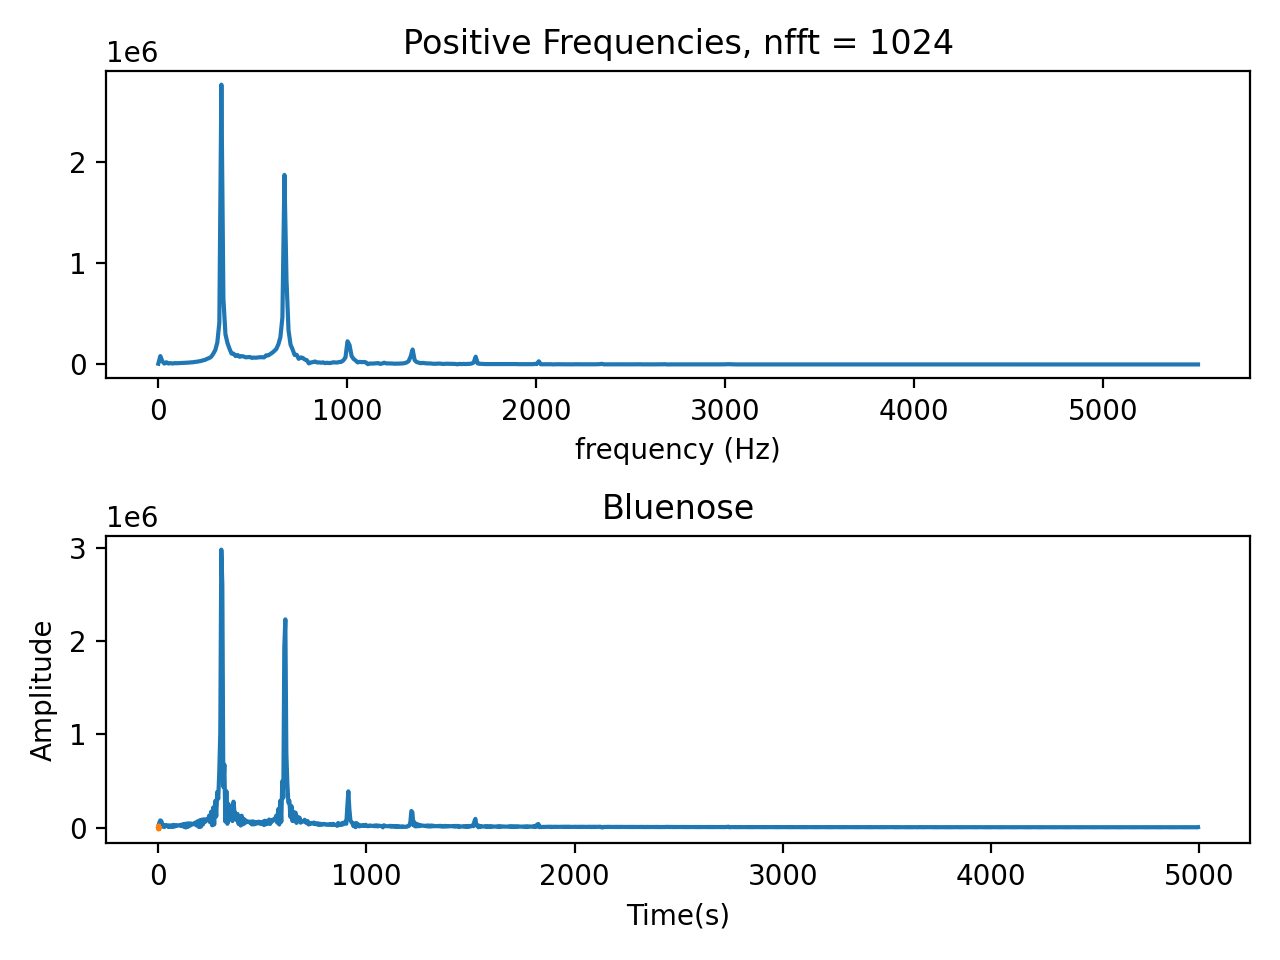

In [9]:
# Part C

nfft3 = 2048

# finding fft of the horn snippet 
xhf3 = np.fft.fft(hornSnippet, nfft3)

# finding magnitude of nfft and frequency
xhf3Abs = np.abs(xhf3)
xhf3Half = xhf3Abs[:nfft3 // 2]
t_arr3 = np.arange(len(xhf3Half)) / fs
freq3 = t_arr3 * fs/nfft3 * 10000


plt.figure(6)

# plotting positive frequencies with nfft = 1024
plt.subplot(211)
plt.title('Positive Frequencies, nfft = 1024')
plt.xlabel('frequency (Hz)')
plt.plot(freq, xhfHalf)

# plotting positive frequencies with nfft = 2048
plt.subplot(212)
plt.title('Positive Frequencies, nfft = 2048')
plt.xlabel('frequency (Hz)')
plt.plot(freq3, xhf3Half)

plt.tight_layout()

**Report Discussion**

1.) Assuming the original signal was periodic. Not periodic hence the jagged fluctation in the graph.

2.) Synthesized version of the original signal is perioidic resulting in no irregularities within its graph.

# Section 4: Comparing Frequency Content of a Signal

In [10]:
# Part A:

# reading in wav file
fs_bluenose, bluenose = wav.read('bluenose3.wav')
t_bluenose = np.arange(len(bluenose)) * 1/fs


plt.figure(6)

plt.title('Bluenose')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.plot(t_bluenose, bluenose)
plt.tight_layout()

<IPython.core.display.Javascript object>


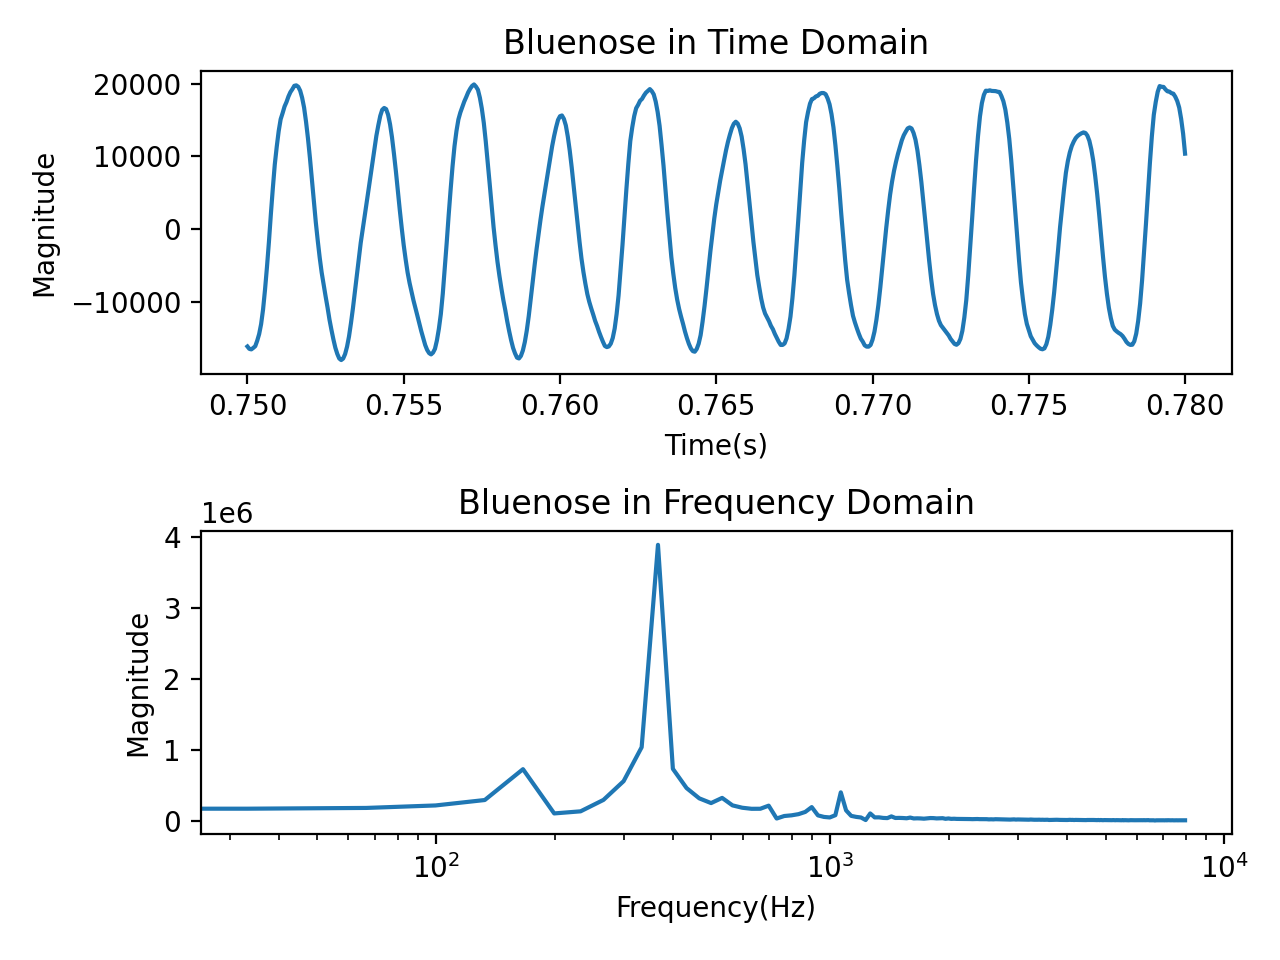

In [11]:
# Part B:

# extracting segment of bluenose
# creating corresponding time vector
bluenose_snippet = bluenose[int(.75 * fs_bluenose):int(.78 * fs_bluenose) + 1]
time_snippet = np.arange(.75, .78, 1/fs_bluenose)
nfft_blue = len(time_snippet)

# calculating fft of bluenose snippet
fft_bluenose = np.fft.fft(bluenose_snippet, nfft_blue)
#fft2_bluenose = np.fft.fftshift(fft_bluenose)

# finding magnitude for fft
# creating frequency vector (positive)
fft_Abs_bluenose = np.abs(fft_bluenose)
fft_Half_bluenose = fft_Abs_bluenose[:nfft_blue // 2]
t_arr_bluenose = np.arange(len(fft_Half_bluenose))
freq_bluenose = t_arr_bluenose * fs_bluenose / nfft_blue

plt.figure(7)

# plotting Bluenose with respect to time
plt.subplot(211)
plt.title('Bluenose in Time Domain')
plt.xlabel('Time(s)')
plt.ylabel('Magnitude')
plt.plot(time_snippet, bluenose_snippet)

# plotting Bluenose with respect to frequency
plt.subplot(212)
plt.title('Bluenose in Frequency Domain')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude')
plt.xscale('log')
plt.plot(freq_bluenose, fft_Half_bluenose)

plt.tight_layout()

481


<IPython.core.display.Javascript object>


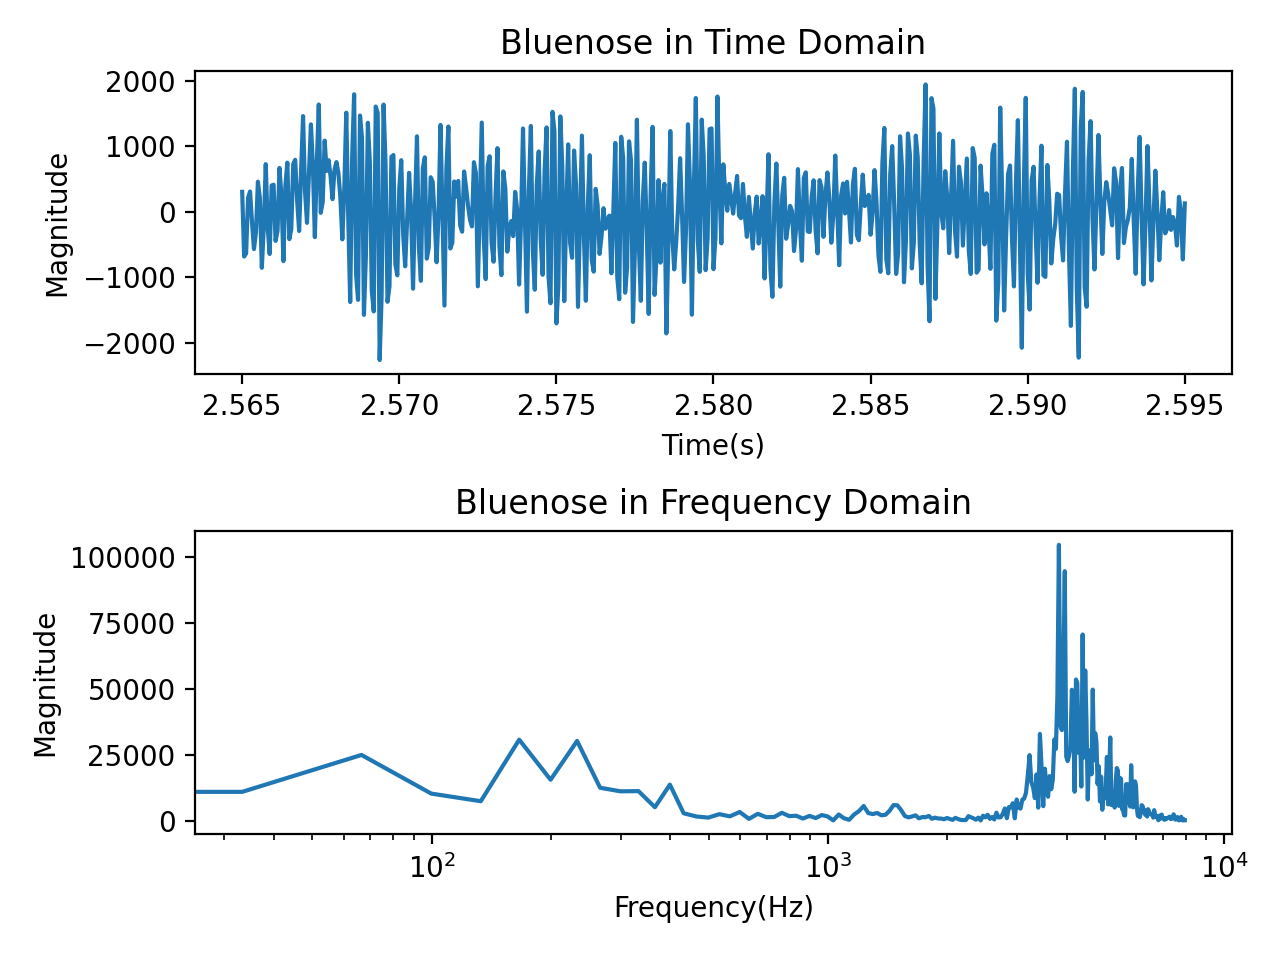

In [13]:
# Part C:

# extracting segment of bluenose
# creating corresponding time vector
bluenose_snippet2 = bluenose[int(2.565 * fs_bluenose):int(2.595 * fs_bluenose) + 1]
time_snippet2 = np.arange(2.565, 2.595, 1/fs_bluenose)
nfft_blue2 = len(time_snippet2)

# calculating fft of bluenose snippet
fft_bluenose2 = np.fft.fft(bluenose_snippet2, nfft_blue2)

# finding magnitude of fft
# creating frequency vector
fft_Abs_bluenose2 = np.abs(fft_bluenose2)
fft_Half_bluenose2 = fft_Abs_bluenose2[:nfft_blue2 // 2]
t_arr_bluenose2 = np.arange(len(fft_Half_bluenose2))
freq_bluenose2 = t_arr_bluenose2 * fs_bluenose / nfft_blue2

plt.figure(8)

# plotting Bluenose with respect to time
plt.subplot(211)
plt.title('Bluenose in Time Domain')
plt.xlabel('Time(s)')
plt.ylabel('Magnitude')
plt.plot(time_snippet2, bluenose_snippet2)

# plotting Bluenose with respect to frequency
plt.subplot(212)
plt.title('Bluenose in Frequency Domain')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude')
plt.xscale('log')
plt.plot(freq_bluenose2, fft_Half_bluenose2)

plt.tight_layout()

**Report Discussion**

FFT = 512 because 1024 / 2

The value 512 was used because the nfft value of Bluenose was 481. Choosing a value closer to Bluenose's would result in less 0's being added to the final value. The time plot resulted in the closest representation of a sinusoidal wave. As for the frequency plot, it contained the fundamental frequency along with its harmonics. The second time plot resulted in a graph that was more abstract. The second frequency plot did not contain the spike patterns correlated with a periodic signal.